In [11]:
.libPaths()


[1] "/enadisk/maison/sage2016/weber/.conda/envs/R_env/lib/R/library"

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)

In [7]:
install.packages('pillar')

In [1]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
theme_set(theme_bw(base_size = 16))
options(repr.plot.width = 15, repr.plot.height = 15)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

In [2]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
options(knitr.table.format = "html")
library(patchwork)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")

# Plot
data %>%
  filter(!is.na(Value)) %>%
  arrange(Value) %>%
  tail(20) %>%
  mutate(Country=factor(Country, Country)) %>%
  ggplot( aes(x=Country, y=Value) ) +
    geom_segment( aes(x=Country ,xend=Country, y=0, yend=Value), color="grey") +
    geom_point(size=5, color="#69b3a2") +
    coord_flip() +
    theme_ipsum( base_size = 20) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position="none",
    ) +
    xlab("") +
    ylab("Weapon quantity (SIPRI trend-indicator value)")

ERROR: Error: package or namespace load failed for ‘tidyverse’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘pillar’ 1.4.7 is already loaded, but >= 1.5.0 is required


In [4]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_Rdata.xlsx")

cutoff_sqtl

Tissue,EXOTIC_max
<chr>,<dbl>
Adipose - Subcutaneous,0.9819987
Adipose - Visceral (Omentum),0.9245939
Adrenal Gland,0.9703809
Artery - Aorta,0.9383033
Artery - Coronary,0.9316118
Artery - Tibial,0.9716379
Brain - Amygdala,0.8954796
Brain - Anterior cingulate cortex (BA24),0.9494846
Brain - Caudate (basal ganglia),0.8681209


Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


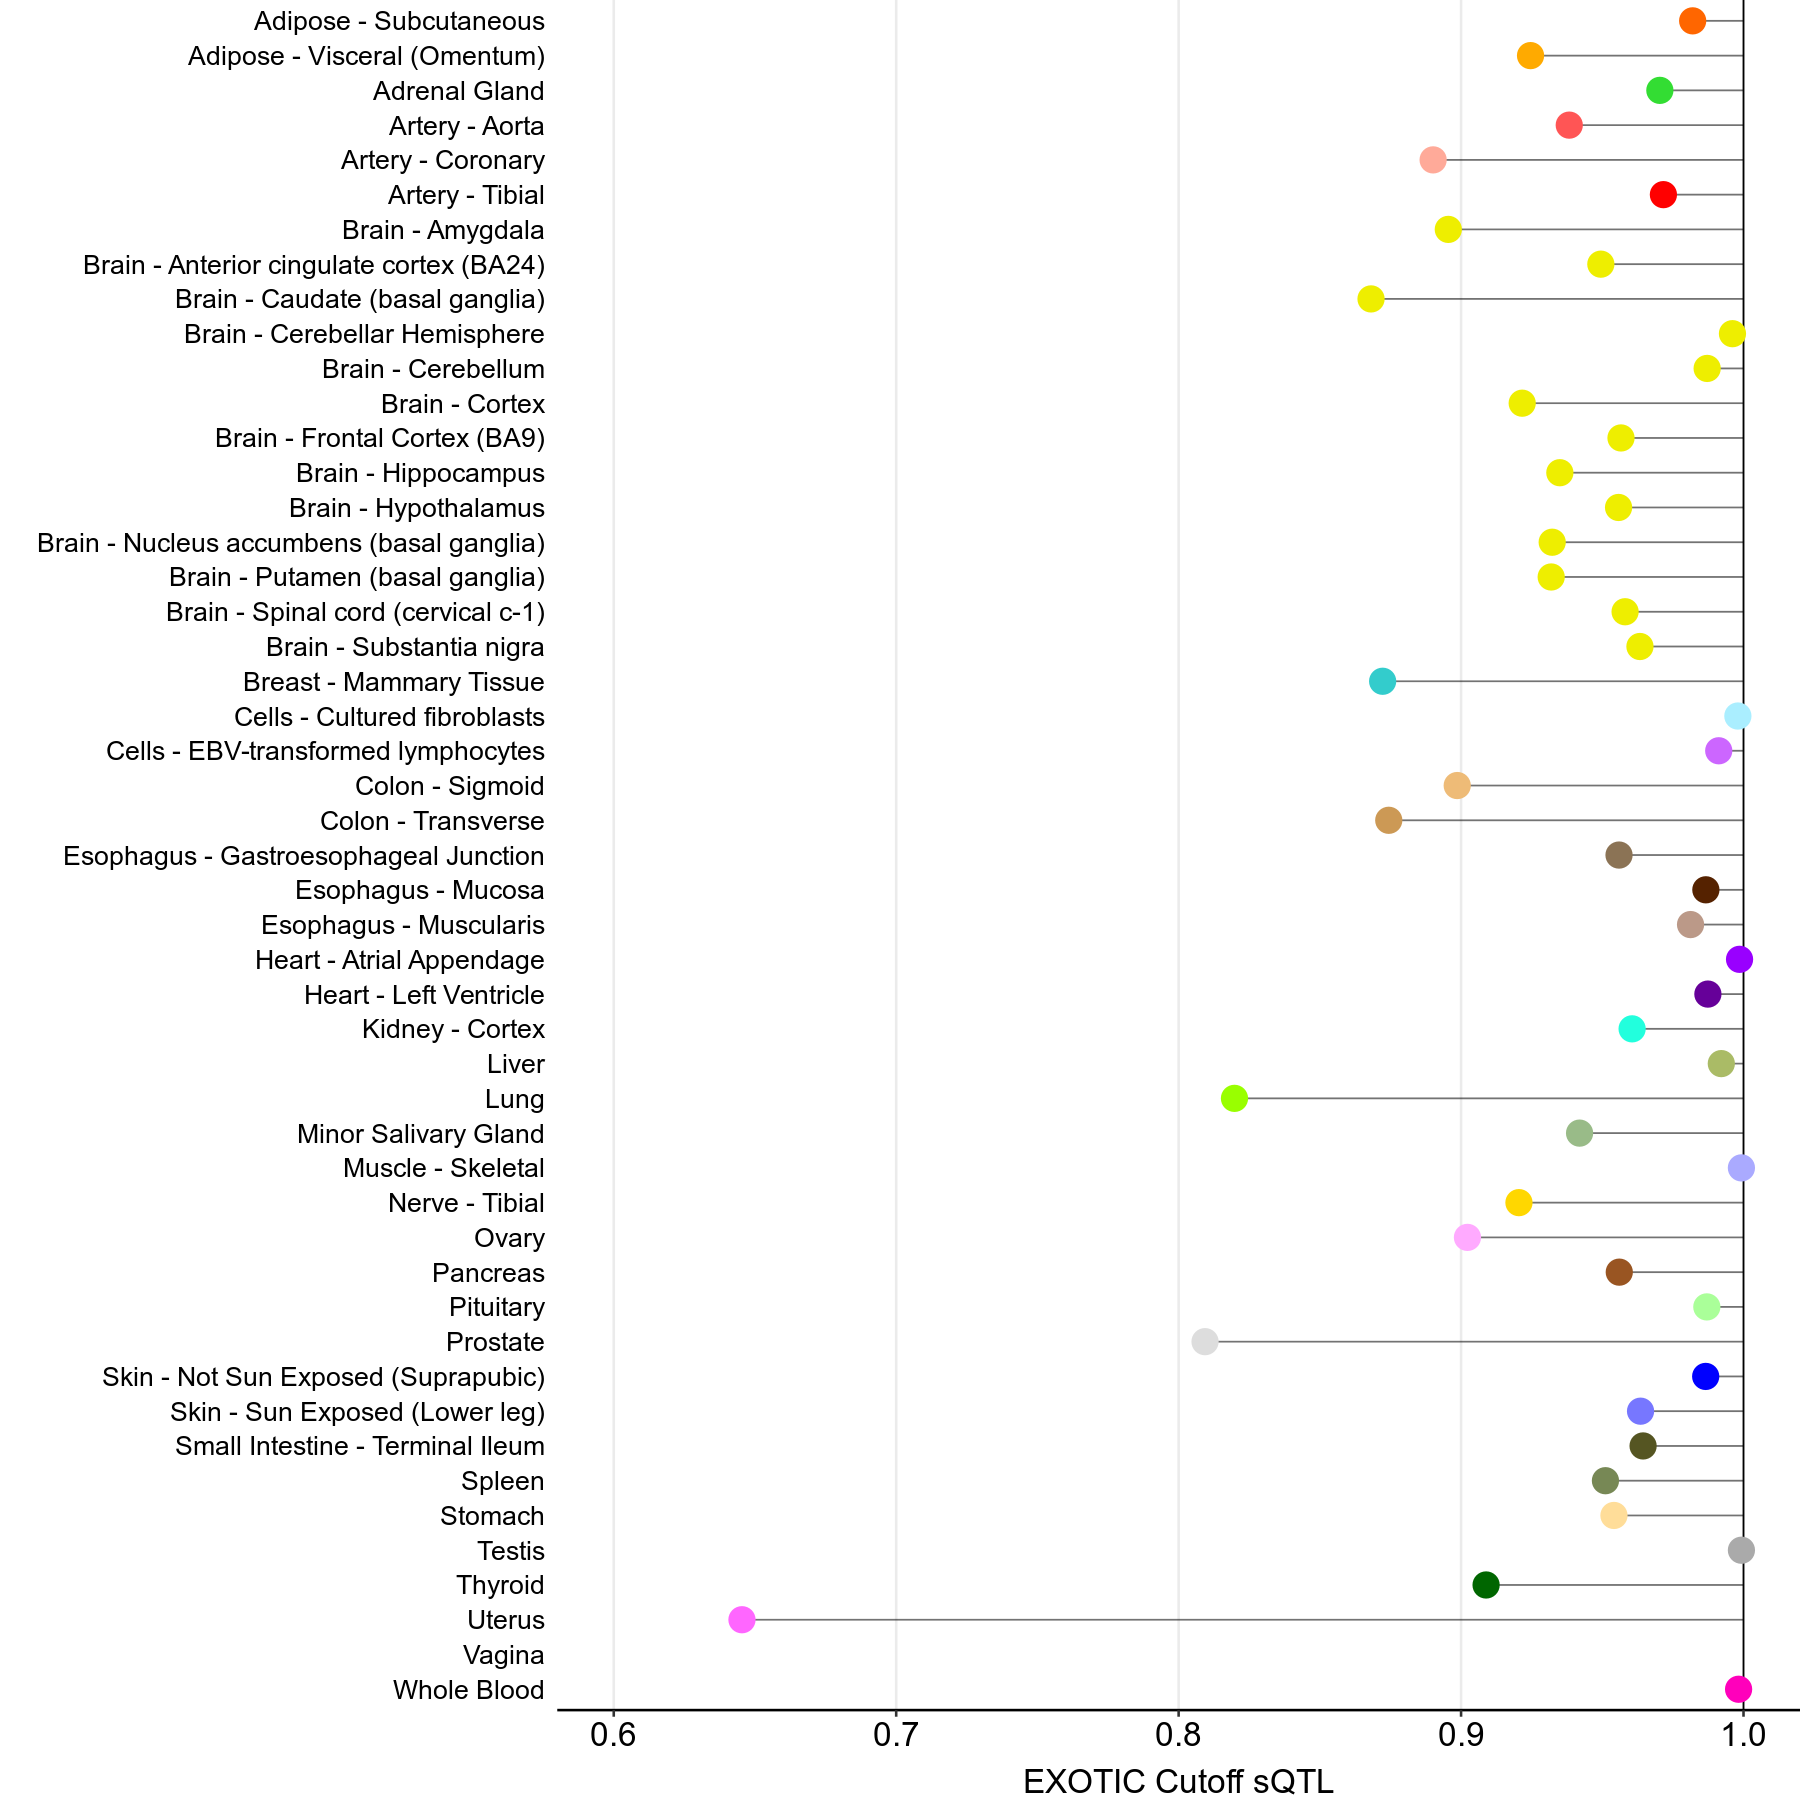

In [13]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_max_Rdata.xlsx")
# cutoff_sqtl

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)
colors = colors[colors$Tissue %in% cutoff_sqtl$Tissue ,]


# Plot
# cutoff_sqtl %>%
#   mutate(Tissue=factor(Tissue, Tissue)) %>%

ggplot(cutoff_sqtl, aes(x=Tissue, y=EXOTIC_max), stat='identity',)  +
    geom_hline(yintercept = 1, color = "black", size=0.5) + 

    geom_segment( aes(x=Tissue, xend=Tissue, y=EXOTIC_max, yend=1, alpha=0.5) ) +
#     geom_bar(aex)

    geom_point(size=7,color=colors$Color) +  
    coord_flip() +
    scale_y_continuous(limits=c(0.6,1)) +
    scale_x_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) + 
#     theme_ipsum( base_size = 18) +
    theme(
        strip.background = element_rect(color="black", fill="white", size=1.5, linetype="solid"),
        legend.position = "none", 
        axis.ticks.y = element_blank(), 
    #     axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line.x = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=20)) +
#     xlim(0.5,1) + 
    xlab("") +
    ylab("EXOTIC Cutoff sQTL")

In [4]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_EXOTIC_modified_up_Rdata.xlsx")
cutoff_sqtl

NameError: name 'cutoff_sqtl' is not defined

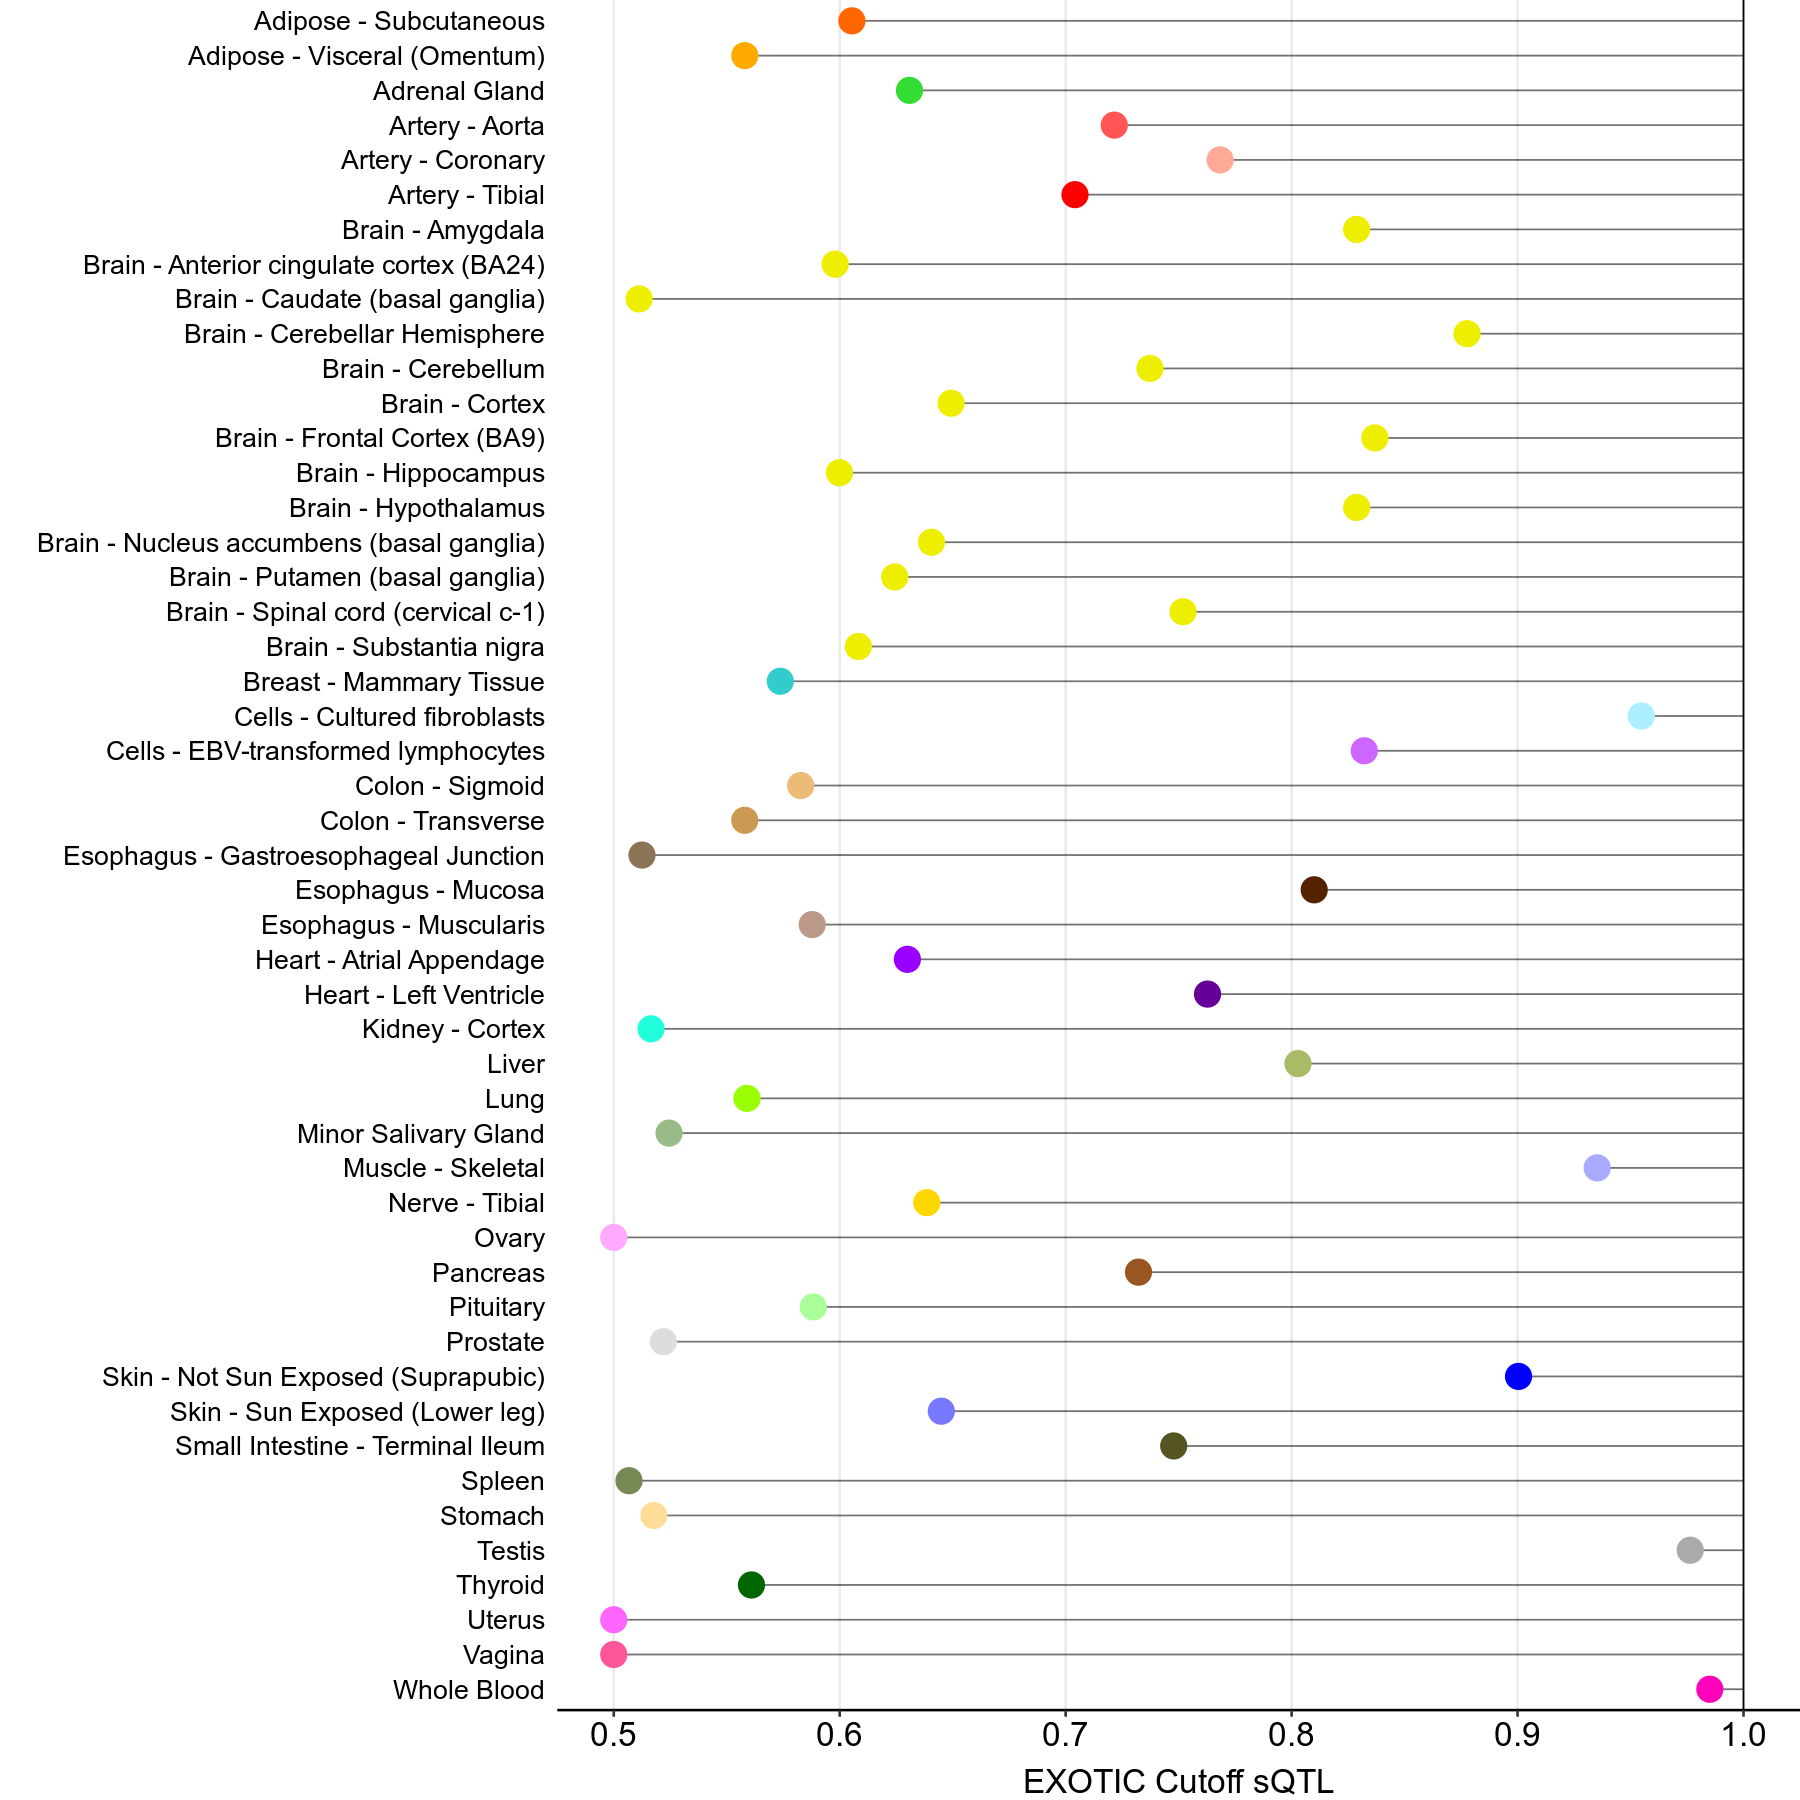

In [5]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_EXOTIC_modified_up_Rdata.xlsx")
# cutoff_sqtl

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)
colors = colors[colors$Tissue %in% cutoff_sqtl$Tissue ,]


# Plot
# cutoff_sqtl %>%
#   mutate(Tissue=factor(Tissue, Tissue)) %>%

ggplot(cutoff_sqtl, aes(x=Tissue, y=EXOTIC_up), stat='identity',)  +
    geom_hline(yintercept = 1, color = "black", size=0.5) + 

    geom_segment( aes(x=Tissue, xend=Tissue, y=EXOTIC_up, yend=1, alpha=0.5) ) +
#     geom_bar(aex)

    geom_point(size=7,color=colors$Color) +  
    coord_flip() +
    scale_y_continuous(limits=c(0.5,1)) +
    scale_x_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) + 
#     theme_ipsum( base_size = 18) +
    theme(
        strip.background = element_rect(color="black", fill="white", size=1.5, linetype="solid"),
        legend.position = "none", 
        axis.ticks.y = element_blank(), 
    #     axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line.x = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=20)) +
#     xlim(0.5,1) + 
    xlab("") +
    ylab("EXOTIC Cutoff sQTL")

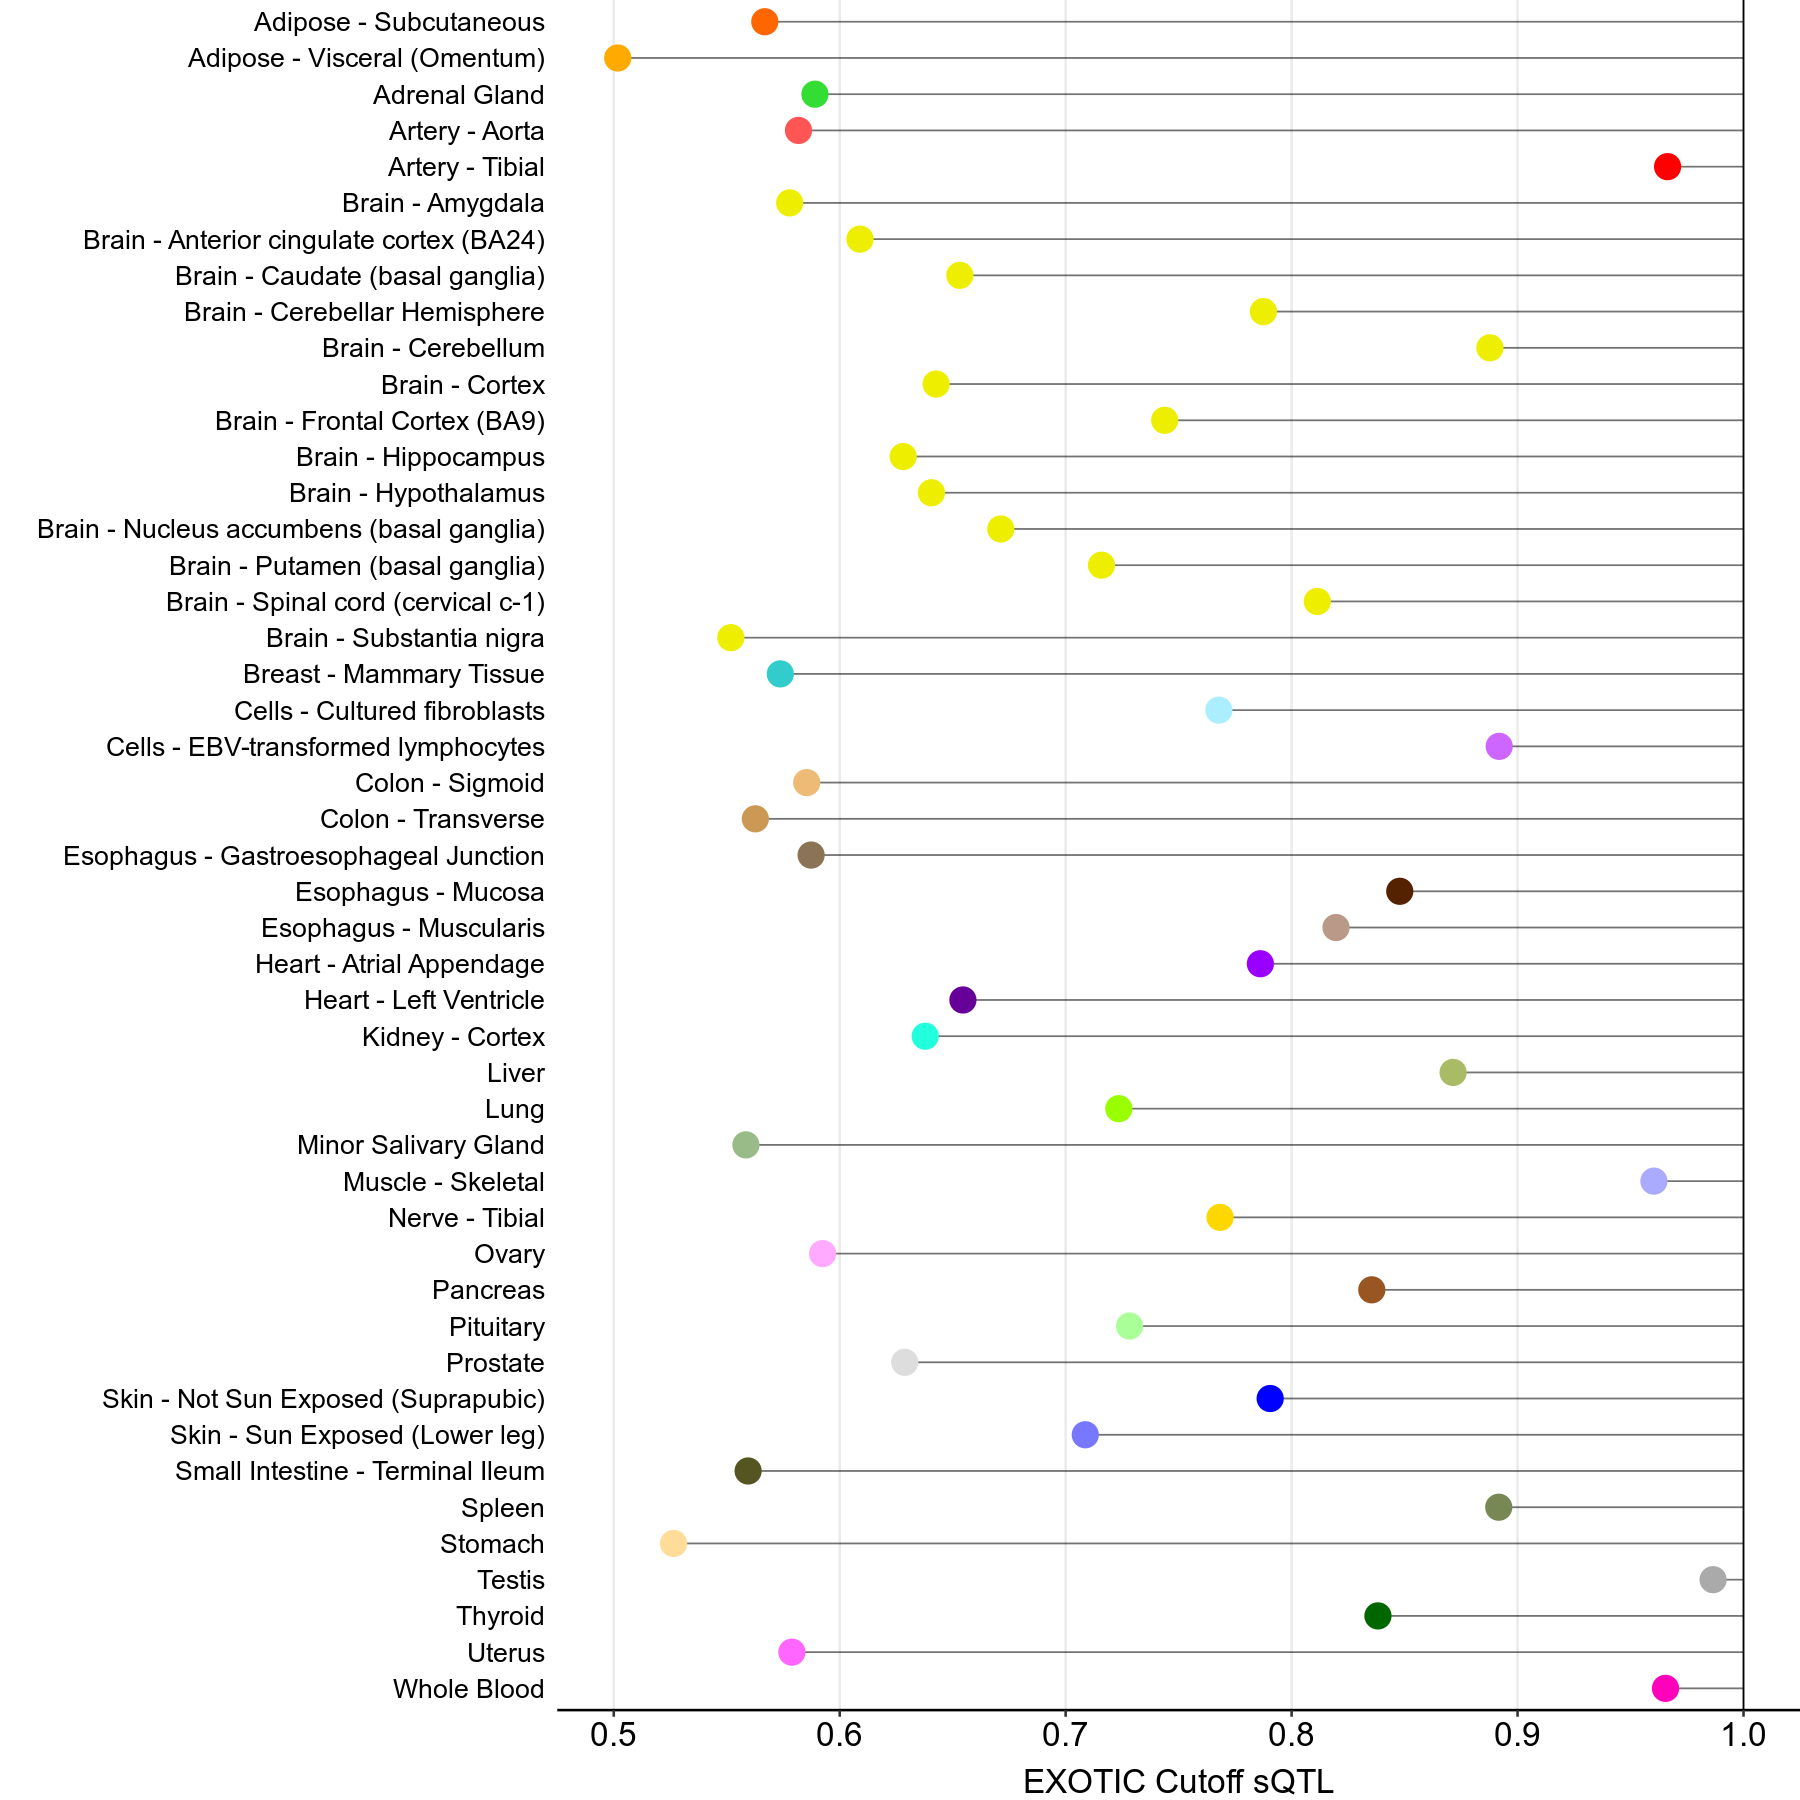

In [6]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_EXOTIC_modified_down_Rdata.xlsx")
# cutoff_sqtl

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)
colors = colors[colors$Tissue %in% cutoff_sqtl$Tissue ,]


# Plot
# cutoff_sqtl %>%
#   mutate(Tissue=factor(Tissue, Tissue)) %>%

ggplot(cutoff_sqtl, aes(x=Tissue, y=EXOTIC_down), stat='identity',)  +
    geom_hline(yintercept = 1, color = "black", size=0.5) + 

    geom_segment( aes(x=Tissue, xend=Tissue, y=EXOTIC_down, yend=1, alpha=0.5) ) +
#     geom_bar(aex)

    geom_point(size=7,color=colors$Color) +  
    coord_flip() +
    scale_y_continuous(limits=c(0.5,1)) +
    scale_x_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) + 
#     theme_ipsum( base_size = 18) +
    theme(
        strip.background = element_rect(color="black", fill="white", size=1.5, linetype="solid"),
        legend.position = "none", 
        axis.ticks.y = element_blank(), 
    #     axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line.x = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=20)) +
#     xlim(0.5,1) + 
    xlab("") +
    ylab("EXOTIC Cutoff sQTL")

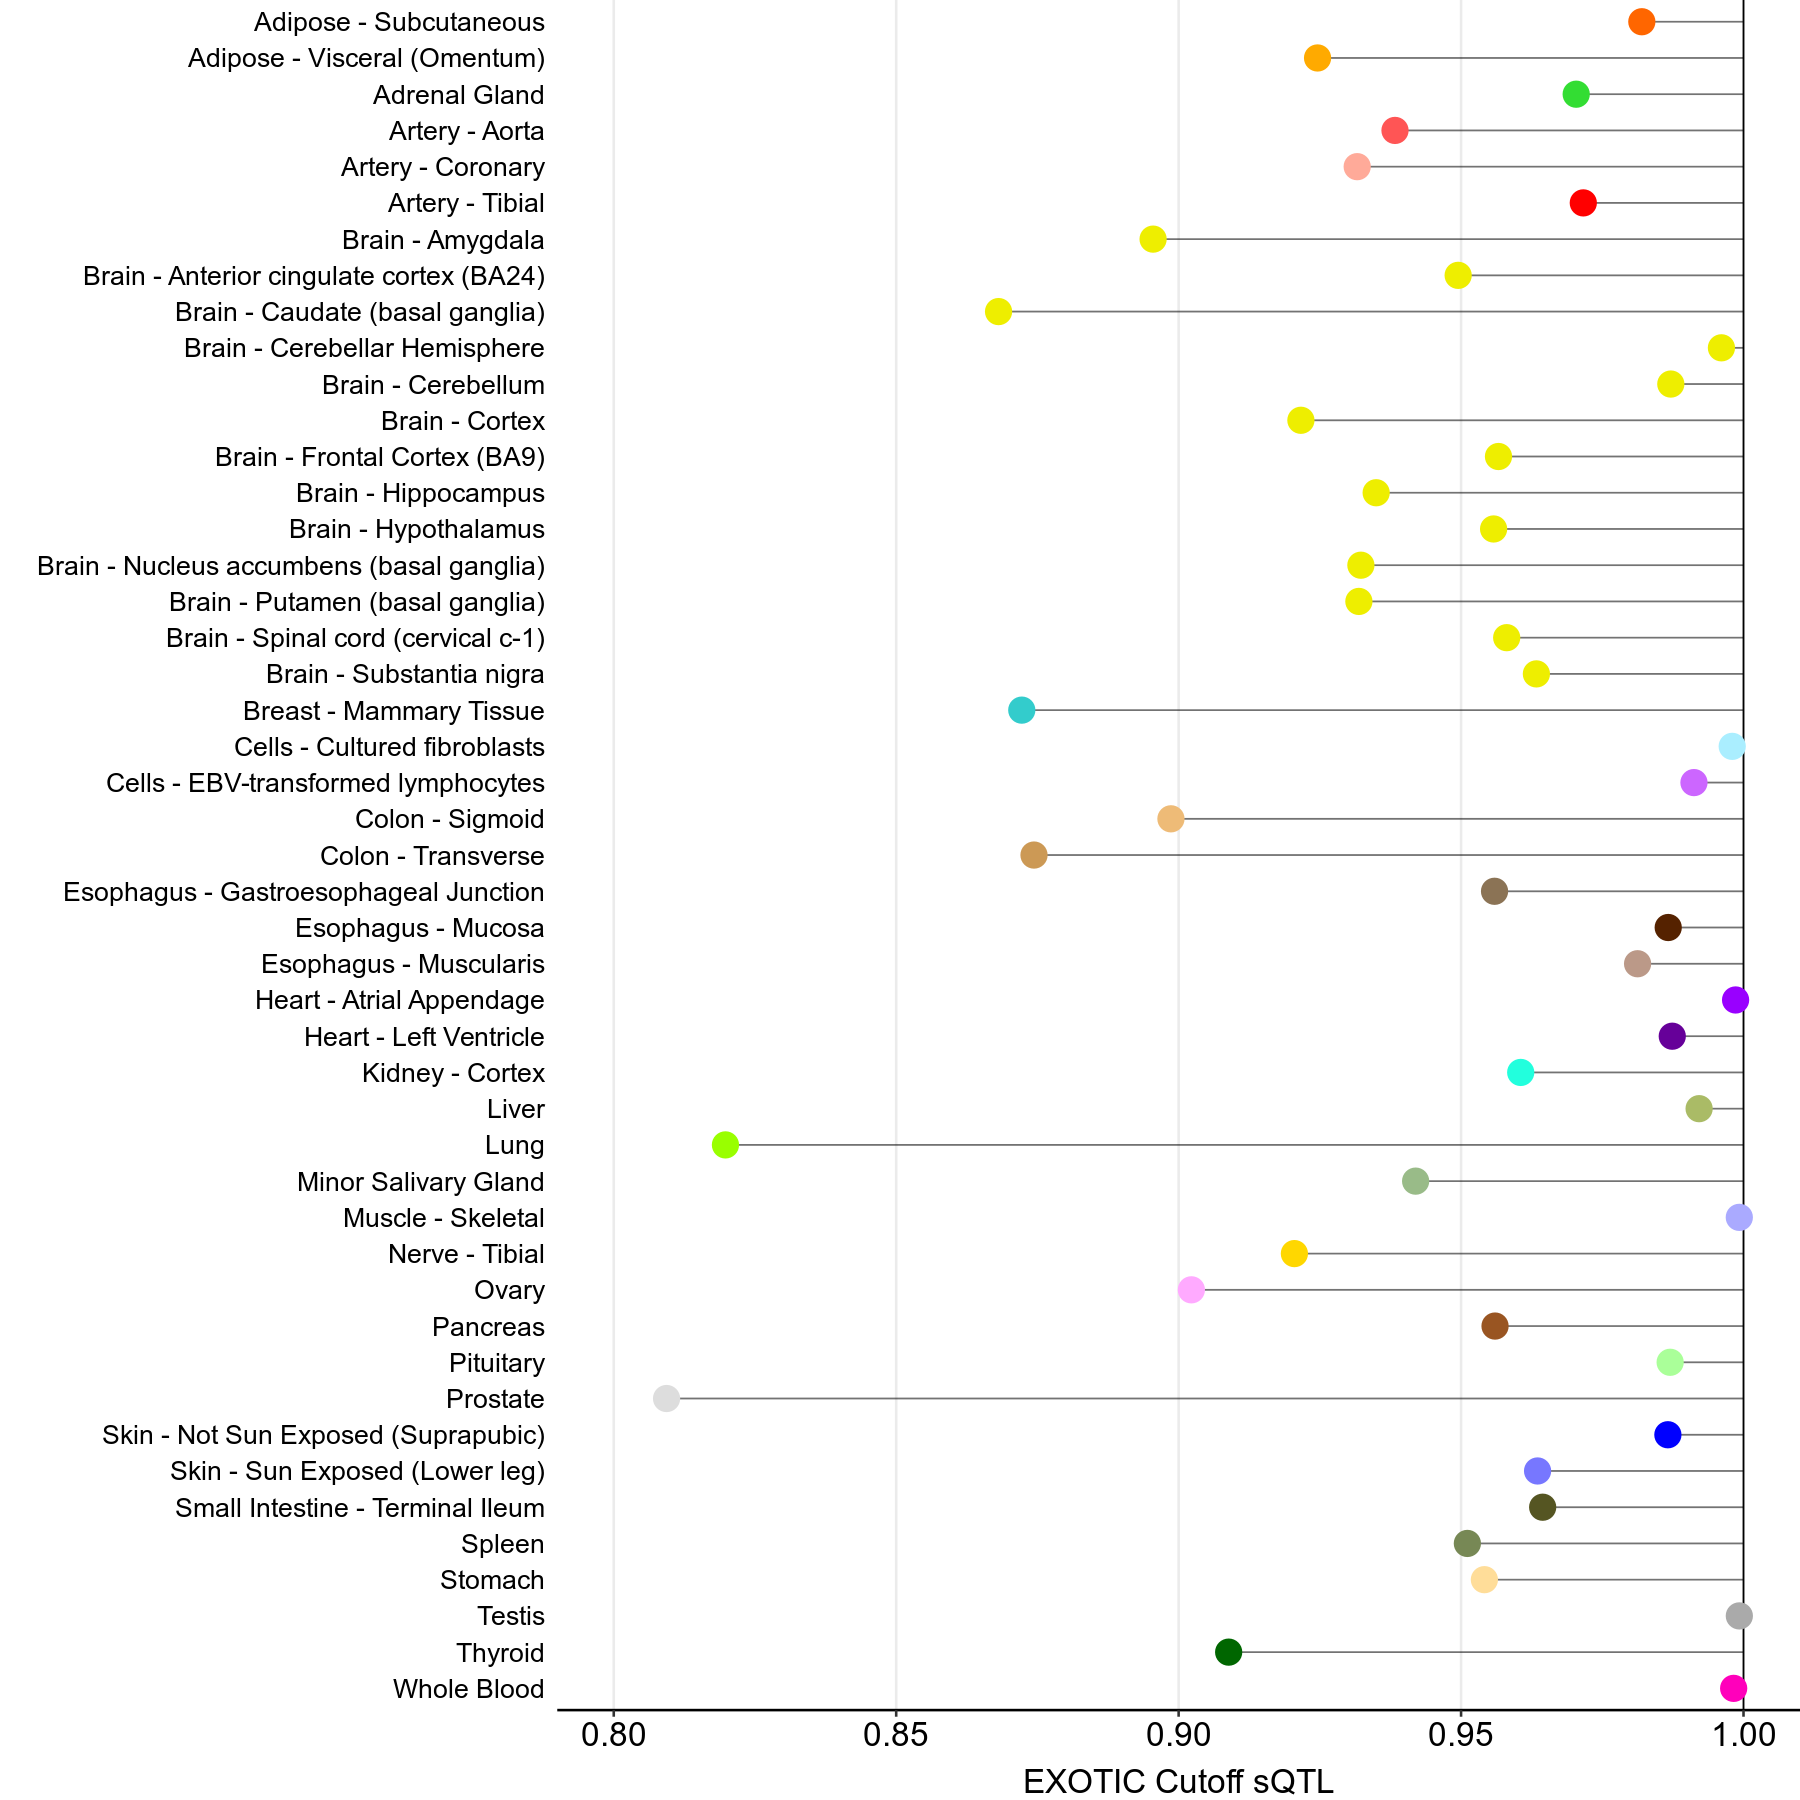

In [112]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_Rdata.xlsx")
cutoff_sqtl <- cutoff_sqtl[cutoff_sqtl$EXOTIC_max > 0.8, ]
# cutoff_sqtl

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)
colors = colors[colors$Tissue %in% cutoff_sqtl$Tissue ,]


# Plot
# cutoff_sqtl %>%
#   mutate(Tissue=factor(Tissue, Tissue)) %>%

ggplot(cutoff_sqtl, aes(x=Tissue, y=EXOTIC_max), stat='identity',)  +
    geom_hline(yintercept = 1, color = "black", size=0.5) + 

    geom_segment( aes(x=Tissue, xend=Tissue, y=EXOTIC_max, yend=1, alpha=0.5) ) +
#     geom_bar(aex)

    geom_point(size=7,color=colors$Color) +  
    coord_flip() +
    scale_y_continuous(limits=c(0.8,1)) +
    scale_x_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) + 
#     theme_ipsum( base_size = 18) +
    theme(
        strip.background = element_rect(color="black", fill="white", size=1.5, linetype="solid"),
        legend.position = "none", 
        axis.ticks.y = element_blank(), 
    #     axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line.x = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=20)) +
#     xlim(0.5,1) + 
    xlab("") +
    ylab("EXOTIC Cutoff sQTL")

Tissue,EXOTIC_min
<chr>,<dbl>
Adipose - Subcutaneous,0.0523814675
Adipose - Visceral (Omentum),0.1419798411
Adrenal Gland,0.0536193029
Artery - Aorta,0.0870508330
Artery - Coronary,0.2499181839
Artery - Tibial,0.0074319380
Brain - Amygdala,0.1001842128
Brain - Anterior cingulate cortex (BA24),0.1266537496
Brain - Caudate (basal ganglia),0.1045971379


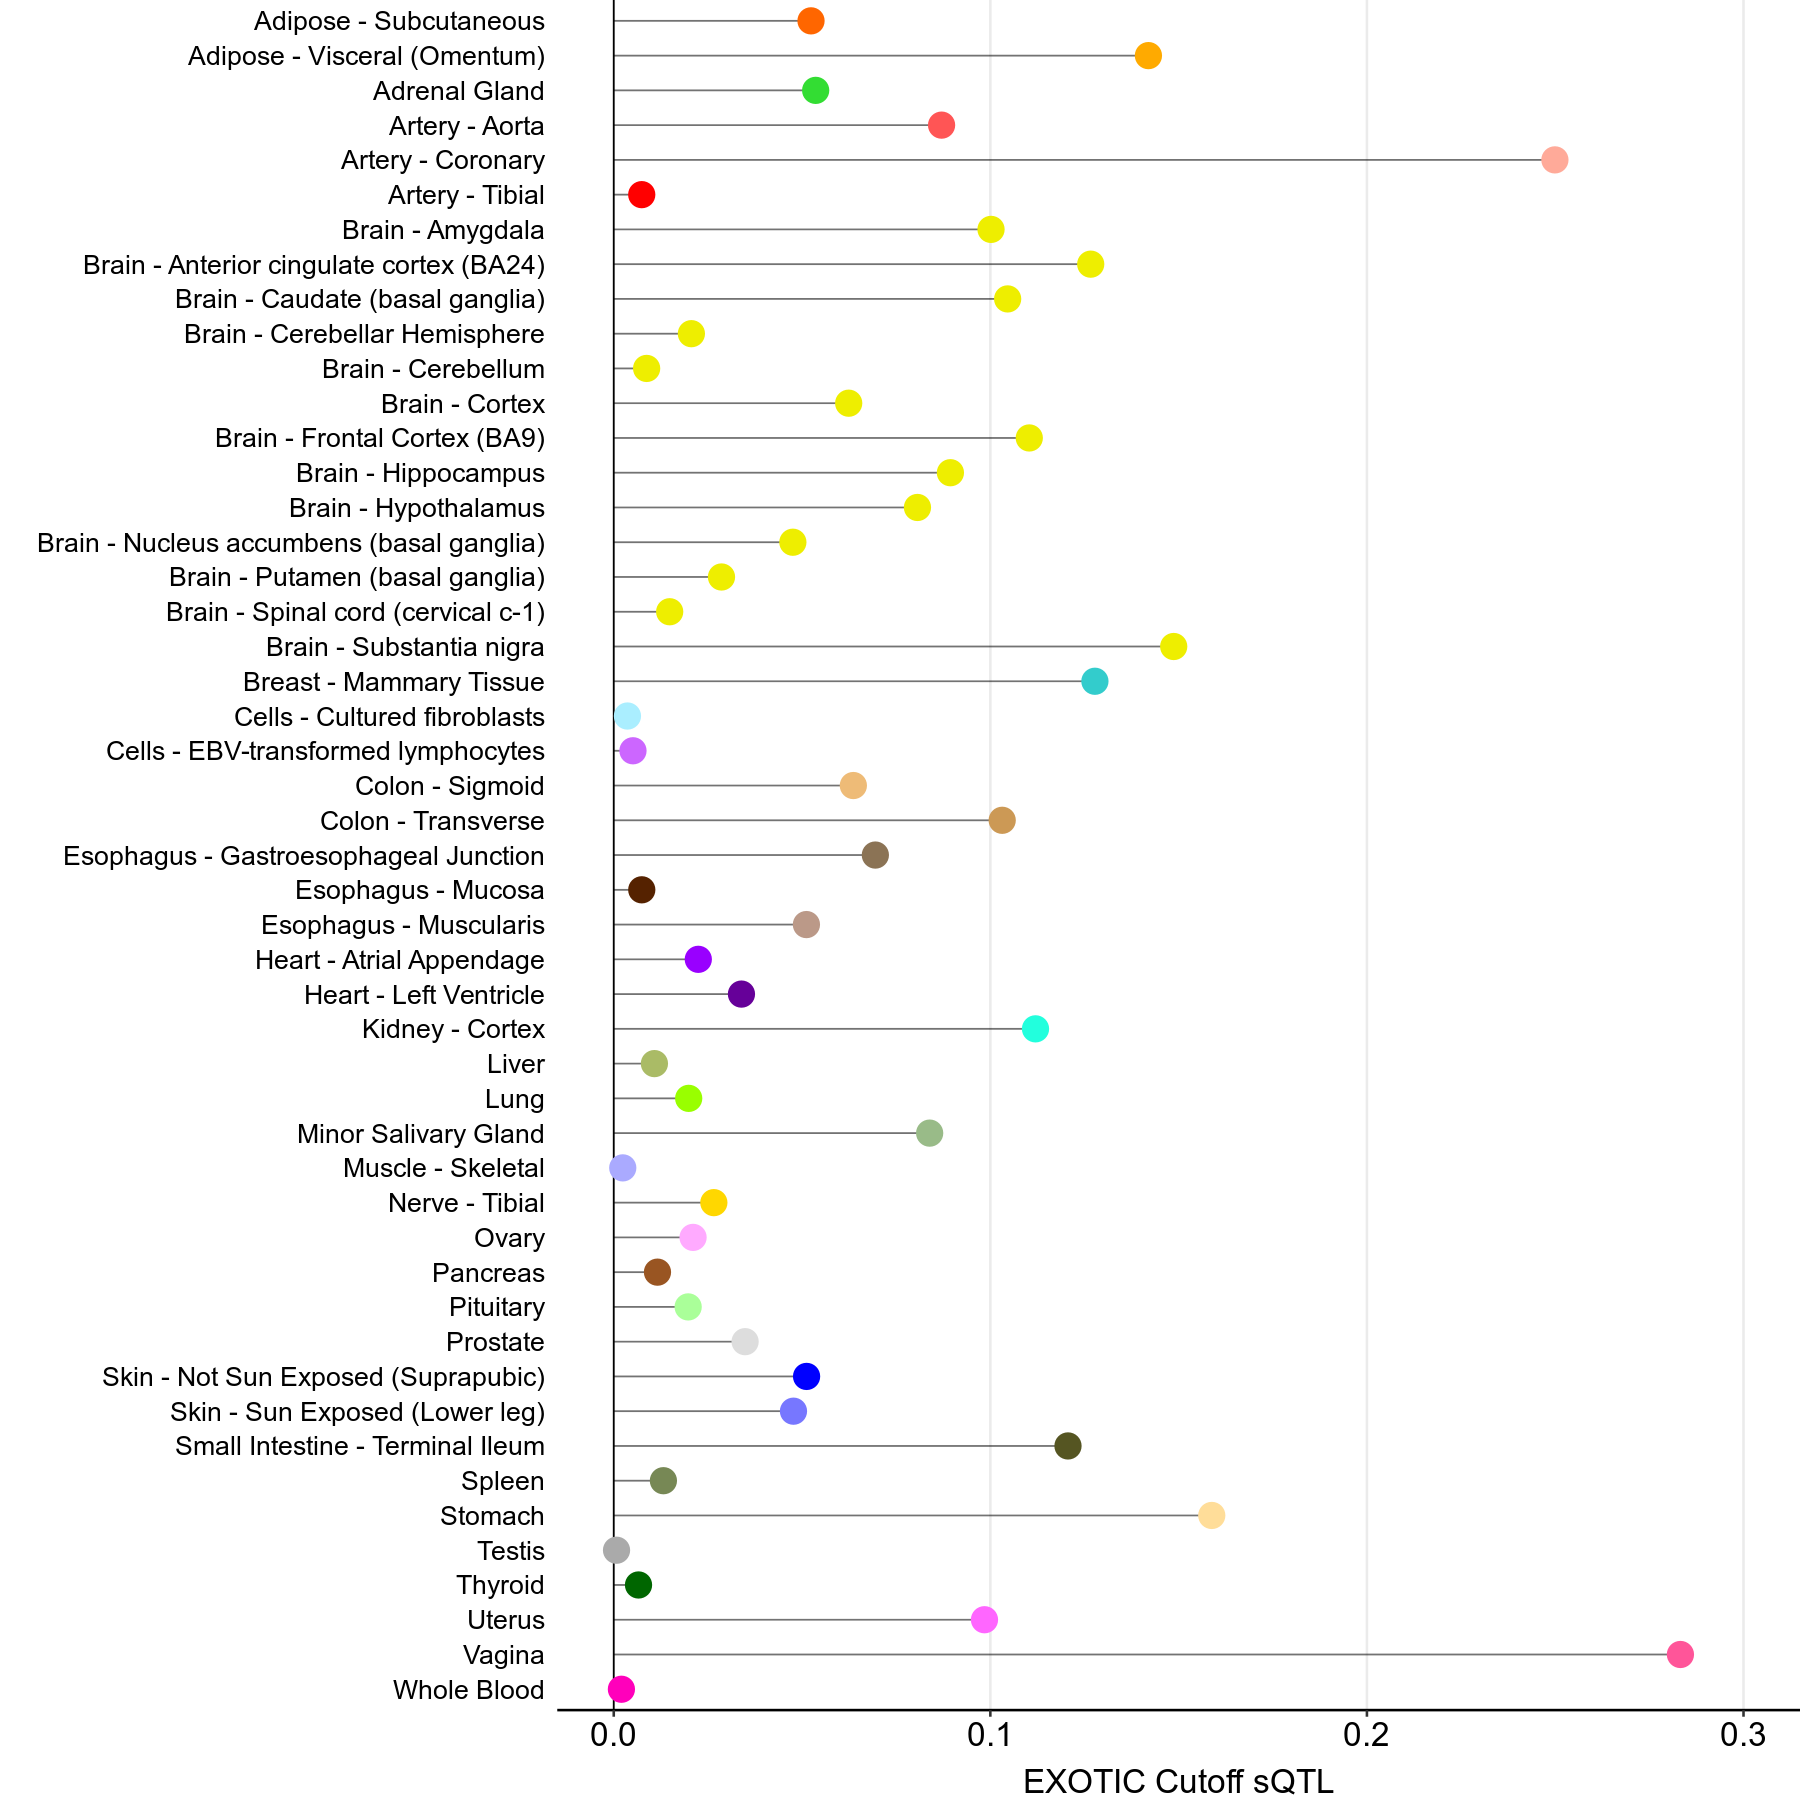

In [12]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_min_Rdata.xlsx")
cutoff_sqtl

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)
colors = colors[colors$Tissue %in% cutoff_sqtl$Tissue ,]


# Plot
# cutoff_sqtl %>%
#   mutate(Tissue=factor(Tissue, Tissue)) %>%

ggplot(cutoff_sqtl, aes(x=Tissue, y=EXOTIC_min), stat='identity',)  +
    geom_hline(yintercept = 0, color = "black", size=0.5) + 

    geom_segment( aes(x=Tissue, xend=Tissue, y=EXOTIC_min, yend=0, alpha=0.5) ) +
#     geom_bar(aex)

    geom_point(size=7,color=colors$Color) +  
    coord_flip() +
    scale_y_continuous(limits=c(0,0.3)) +
    scale_x_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) + 
#     theme_ipsum( base_size = 18) +
    theme(
        strip.background = element_rect(color="black", fill="white", size=1.5, linetype="solid"),
        legend.position = "none", 
        axis.ticks.y = element_blank(), 
    #     axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line.x = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=20)) +
#     xlim(0.5,1) + 
    xlab("") +
    ylab("EXOTIC Cutoff sQTL")